# Load Python Libraries

In [4]:
import numpy as np

import pandas as pd

import matplotlib.pyplot as plt


import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

IMPORT DATA

In [17]:
df = pd.read_csv('https://github.com/BharathVpro/Data-Analysis-Projects/blob/main/telecom_users.csv')

ParserError: Error tokenizing data. C error: Expected 1 fields in line 73, saw 2


In [6]:
df.head(10)   

,ID,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No
5,2215,4312-GVYNH,Female,0,Yes,No,70,No,No phone service,DSL,...,Yes,Yes,No,Yes,Two year,Yes,Bank transfer (automatic),49.85,3370.2,No
6,5260,2495-KZNFB,Female,0,No,No,33,Yes,Yes,Fiber optic,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,90.65,2989.6,No
7,6001,4367-NHWMM,Female,0,No,No,1,No,No phone service,DSL,...,No,No,No,No,Month-to-month,Yes,Mailed check,24.90,24.9,No
8,1480,8898-KASCD,Male,0,No,No,39,No,No phone service,DSL,...,Yes,Yes,No,No,One year,No,Mailed check,35.55,1309.15,No
9,5137,8016-NCFVO,Male,1,No,No,55,Yes,Yes,Fiber optic,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,116.50,6382.55,No


In [7]:
df[df.isnull()==True].sum()   #Verification for null data

ID                  0.0
customerID          0.0
gender              0.0
SeniorCitizen       0.0
Partner             0.0
Dependents          0.0
tenure              0.0
PhoneService        0.0
MultipleLines       0.0
InternetService     0.0
OnlineSecurity      0.0
OnlineBackup        0.0
DeviceProtection    0.0
TechSupport         0.0
StreamingTV         0.0
StreamingMovies     0.0
Contract            0.0
PaperlessBilling    0.0
PaymentMethod       0.0
MonthlyCharges      0.0
TotalCharges        0.0
Churn               0.0
dtype: float64

# Data Cleaning

Replace the Boolean values with Binary values

In [8]:
df.drop('ID', axis =1, inplace = True)    #Removing unwanted data

In [10]:
df.replace('Yes', 1, inplace = True)       #Replacing with binary values
df.replace('No', 0, inplace = True)

df['InternetService'].replace(0,'No Connection',inplace = True)

df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,72,1,1,No Connection,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,0,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,1,0,1,0,Month-to-month,1,Credit card (automatic),88.15,3973.2,0
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,0,0,Month-to-month,1,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,0,0,1,Month-to-month,1,Electronic check,55.90,238.5,0
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,1,0,0,0,Month-to-month,0,Electronic check,53.45,119.5,0


In [11]:
df['Contract'].value_counts()    # finding possible contract methods

Month-to-month    3269
Two year          1441
One year          1276
Name: Contract, dtype: int64

In [12]:
df['Contract'].replace('Two year', 24, inplace = True)  #Converting Years into Months
df['Contract'].replace('One year', 12, inplace = True)
df['Contract'].replace('Month-to-month', 1, inplace = True)


In [13]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7010-BRBUU,Male,0,1,1,72,1,1,No Connection,No internet service,...,No internet service,No internet service,No internet service,No internet service,24,0,Credit card (automatic),24.10,1734.65,0
1,9688-YGXVR,Female,0,0,0,44,1,0,Fiber optic,0,...,1,0,1,0,1,1,Credit card (automatic),88.15,3973.2,0
2,9286-DOJGF,Female,1,1,0,38,1,1,Fiber optic,0,...,0,0,0,0,1,1,Bank transfer (automatic),74.95,2869.85,1
3,6994-KERXL,Male,0,0,0,4,1,0,DSL,0,...,0,0,0,1,1,1,Electronic check,55.90,238.5,0
4,2181-UAESM,Male,0,0,0,2,1,0,DSL,1,...,1,0,0,0,1,0,Electronic check,53.45,119.5,0


In [14]:
df.tail()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
5981,0684-AOSIH,Male,0,1,0,1,1,0,Fiber optic,1,...,0,0,1,1,1,1,Electronic check,95.00,95,1
5982,5982-PSMKW,Female,0,1,1,23,1,1,DSL,1,...,1,1,1,1,24,1,Credit card (automatic),91.10,2198.3,0
5983,8044-BGWPI,Male,0,1,1,12,1,0,No Connection,No internet service,...,No internet service,No internet service,No internet service,No internet service,1,1,Electronic check,21.15,306.05,0
5984,7450-NWRTR,Male,1,0,0,12,1,1,Fiber optic,0,...,1,0,1,1,1,1,Electronic check,99.45,1200.15,1
5985,4795-UXVCJ,Male,0,0,0,26,1,0,No Connection,No internet service,...,No internet service,No internet service,No internet service,No internet service,12,0,Credit card (automatic),19.80,457.3,0


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        5986 non-null   object 
 1   gender            5986 non-null   object 
 2   SeniorCitizen     5986 non-null   int64  
 3   Partner           5986 non-null   int64  
 4   Dependents        5986 non-null   int64  
 5   tenure            5986 non-null   int64  
 6   PhoneService      5986 non-null   int64  
 7   MultipleLines     5986 non-null   object 
 8   InternetService   5986 non-null   object 
 9   OnlineSecurity    5986 non-null   object 
 10  OnlineBackup      5986 non-null   object 
 11  DeviceProtection  5986 non-null   object 
 12  TechSupport       5986 non-null   object 
 13  StreamingTV       5986 non-null   object 
 14  StreamingMovies   5986 non-null   object 
 15  Contract          5986 non-null   int64  
 16  PaperlessBilling  5986 non-null   int64  


In [16]:
df.describe()

,SeniorCitizen,Partner,Dependents,tenure,PhoneService,Contract,PaperlessBilling,MonthlyCharges,Churn
count,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000,5986.000000
mean,0.161377,0.485132,0.299198,32.468760,0.901437,8.881557,0.589375,64.802213,0.265119
std,0.367909,0.499821,0.457945,24.516391,0.298100,9.541196,0.491988,30.114702,0.441433
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.250000,0.000000
25%,0.000000,0.000000,0.000000,9.000000,1.000000,1.000000,0.000000,35.650000,0.000000
50%,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,70.400000,0.000000
75%,0.000000,1.000000,1.000000,56.000000,1.000000,12.000000,1.000000,89.900000,1.000000
max,1.000000,1.000000,1.000000,72.000000,1.000000,24.000000,1.000000,118.750000,1.000000


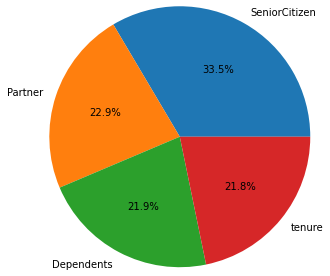

In [19]:
# Payment methods prefered by people
payment = df.groupby(['PaymentMethod'])

plt.pie(df.PaymentMethod.value_counts(), 
        labels = payment.mean(),
        radius = 1.5,
        autopct ='%2.1f%%')
plt.show()


In [18]:
df['Contract'].value_counts()

1     3269
24    1441
12    1276
Name: Contract, dtype: int64

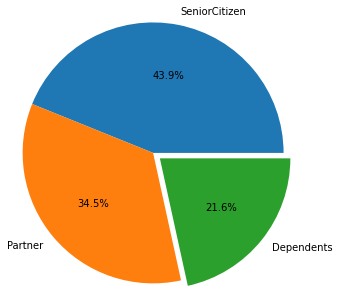

In [22]:

connections =df.groupby(['InternetService'])

plt.pie(df.InternetService.value_counts(), 
        labels =connections.mean(),
        radius = 1.5,
        autopct ='%2.1f%%',
        explode= [0,0,0.1])
plt.show()

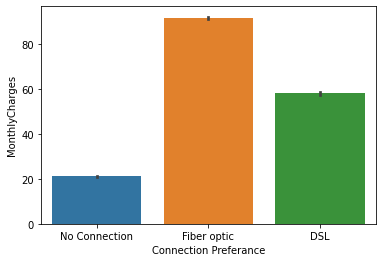

In [70]:
sns.barplot(x='InternetService', 
            y='MonthlyCharges', 
            data=df)
plt.xlabel('Connection Preferance')
plt.show()

( Most of the people prefer Fiber Optic rather )

# Correlation

Finding correlation between customer and services

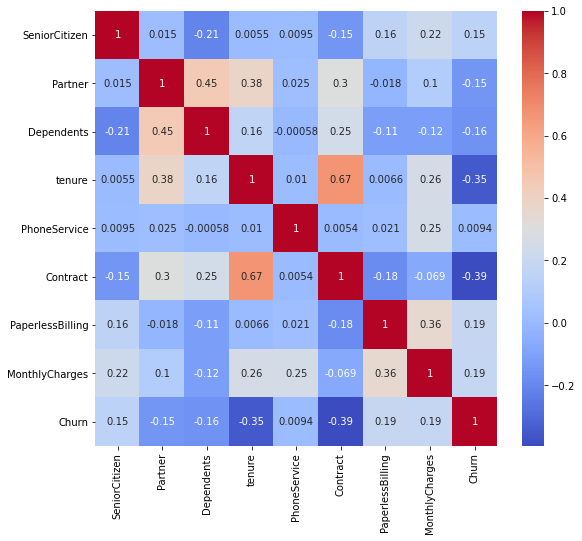

In [127]:
corr =df.corr()

plt.figure(figsize=(9,8))

sns.heatmap(corr, cmap='coolwarm', annot = True)
plt.show()

CLEAR VIEW OF CORRELATION

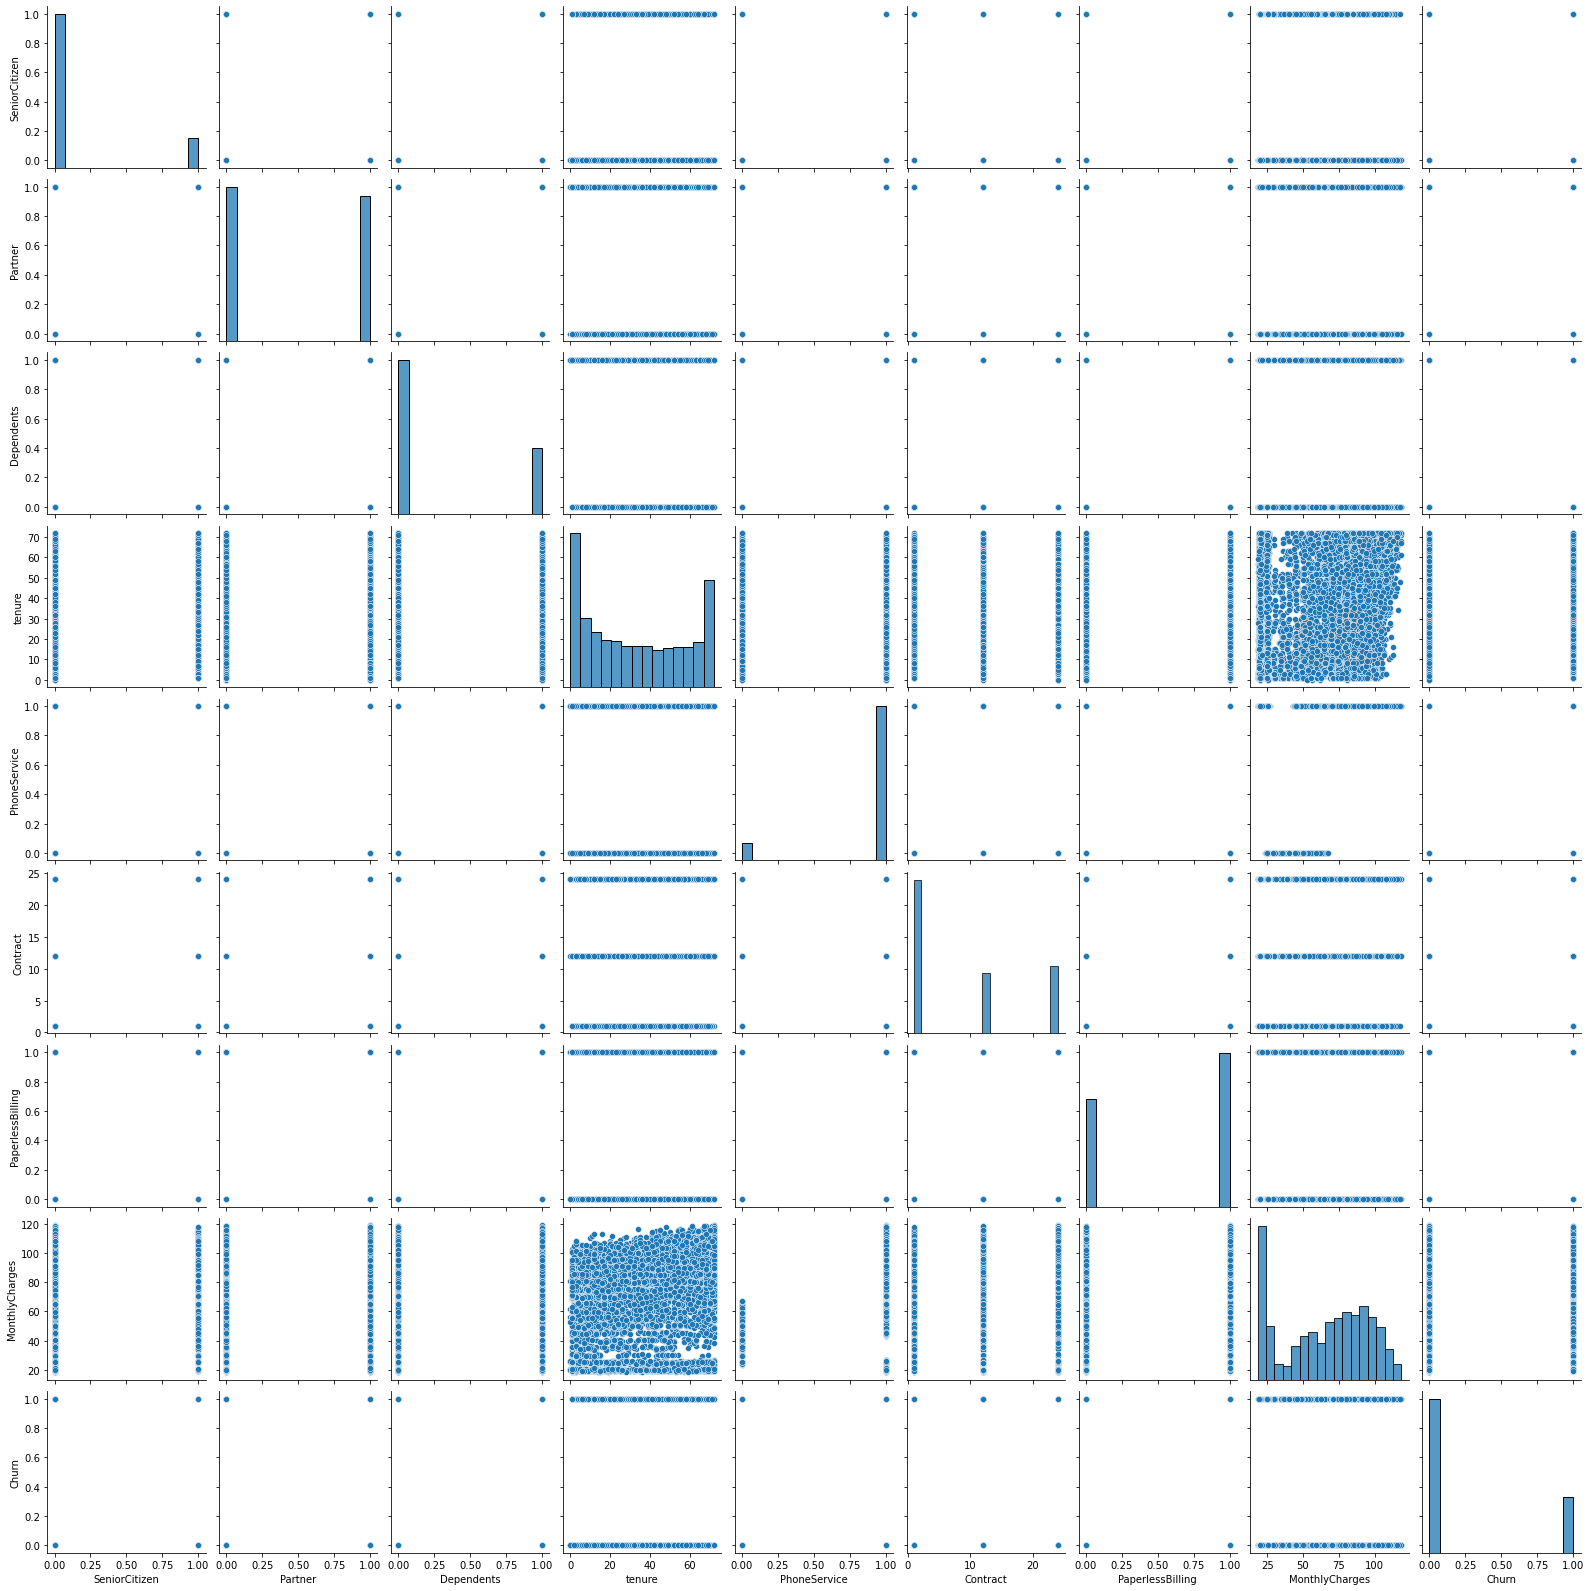

In [129]:
# individual corelation graph b/w them

sns.pairplot(df)
plt.show()

-Its Clearly shows that there is no corelation between any one of them.

So we can conclude that following are the most possible effects:

-Having a partner or not having a partner does not effect the monthly           charges that much, the effect is very minimal.

-Contract year effects monthly costs. The contract with the most length has   the lowest prices because of the commitment of the customer.

-Senior citizens pays more than non senior citizens. That might be because     younger people use more internet so their contracts have more throughput.

-Fiber optic is the fastest and most reliable internet right now. It is not         surprise that it is the most expensive one.

